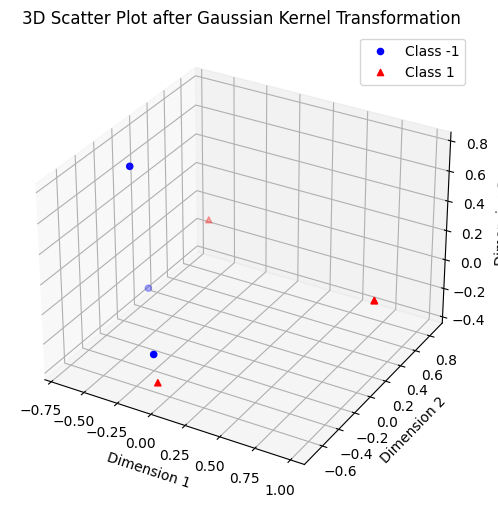

In [13]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Provided dataset
data = torch.tensor([
    [1, 0, -1],
    [0, 1, -1],
    [0, -1, -1],
    [-1, 0, 1],
    [0, 2, 1],
    [0, -2, 1],
    [-2, 0, 1]
], dtype=torch.float)

X = data[:, :-1]
y = data[:, -1]

# Nonlinear transformation
def nonlinear_transform(X):
    return torch.cat((X[:, 1].unsqueeze(1)**2 - 2*X[:, 0].unsqueeze(1) + 3, X[:, 0].unsqueeze(1)**2 - 2*X[:, 1].unsqueeze(1) + 3), dim=1)

# Apply nonlinear transformation
Z = nonlinear_transform(X)

# Apply a Gaussian kernel function
gamma = 0.1  # Adjust the bandwidth parameter
K = torch.tensor(rbf_kernel(Z, Z, gamma=gamma))

# Transform the data into 3D
pca = PCA(n_components=3)
Z_3d = pca.fit_transform(K.numpy())

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for class -1
ax.scatter(Z_3d[y == -1, 0], Z_3d[y == -1, 1], Z_3d[y == -1, 2], label='Class -1', c='blue', marker='o')

# Scatter plot for class 1
ax.scatter(Z_3d[y == 1, 0], Z_3d[y == 1, 1], Z_3d[y == 1, 2], label='Class 1', c='red', marker='^')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3D Scatter Plot after Gaussian Kernel Transformation')

plt.legend()
plt.show()